# Problem Statement:To classify iris flower according to the species.

These are the Steps Required for Any Data Science Task or Project.

Data Gathering :
a. API
b. Web Scraping
c. Secondary or Primary Data from different sources like kaggle,Github,etc.

Data Cleaning:

a.Handle Missing Values:
b.Remove Duplicate Records:
c.Detect and Treat Outliers:
d. Correct Inconsistent Data:

Data Transformation:

a. Feature Scaling: Normalize or standardize numerical features.
b. Feature Encoding: Convert categorical variables into numerical representation.
c. Feature Engineering: Create new features or transform existing ones.
d. Dimensionality Reduction: Reduce the number of features.

Data Integration:
a.Combine data from multiple sources
b.Ensure consistency and compatibility between datasets

Data Reduction:
a. Reduce dataset size if necessary
b.Apply sampling techniques if needed

Data Normalization:
a.Normalize data for improved efficiency and accuracy

Data Splitting:
a.Split the dataset into Training set, Validation set, Test set

Data Visualization:
a.Explore data visually to gain insights

Documentation:
a.Keep track of processing and preprocessing steps
b. Document assumptions and decisions made.

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('./IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df = df.drop_duplicates()


As there are no missing values,so we can move forward to duplicate values.

In [13]:
df.duplicated().sum()

0

We can move forward to oulier detection and transformation.

In [19]:
print(df.columns)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


<AxesSubplot:>

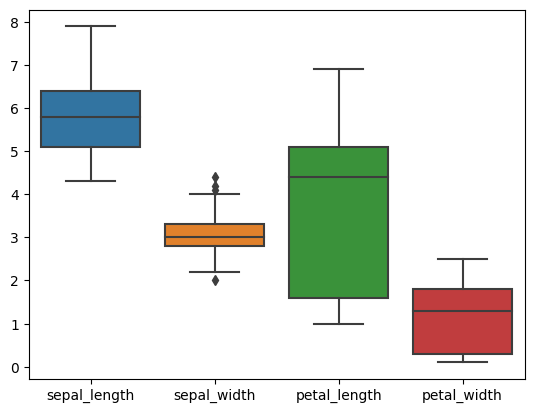

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])


As there are outliers,we can move forward to outlier transformation as clustering are sensitive to outliers.

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

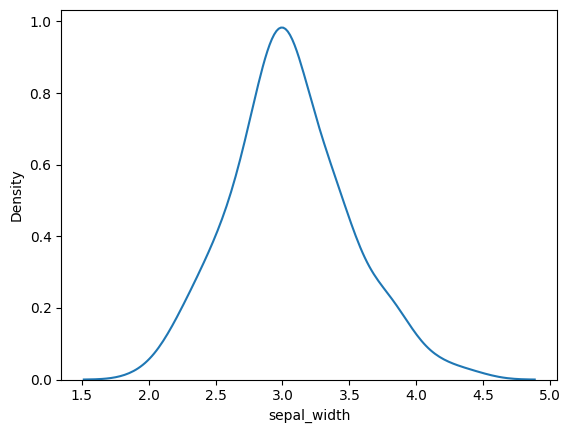

In [23]:
sns.kdeplot(df['sepal_width'])

In [28]:
from scipy.stats import mstats
limits = (0.05, 0.05)
df['sepal_width'] = mstats.winsorize(df['sepal_width'], limits=limits)

C:\Users\91983\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:>

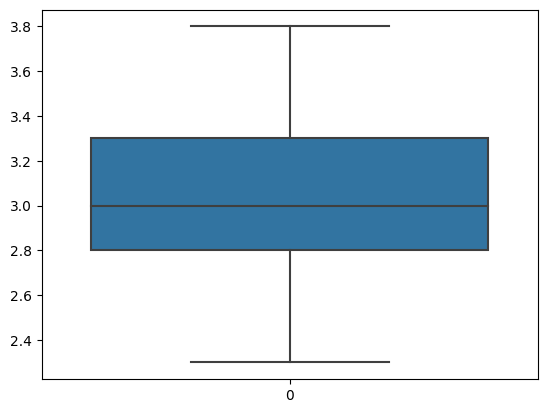

In [29]:
sns.boxplot(df['sepal_width'])

As Outliers are removed from the data, the data is completely preprocessed.

<function matplotlib.pyplot.show(close=None, block=None)>

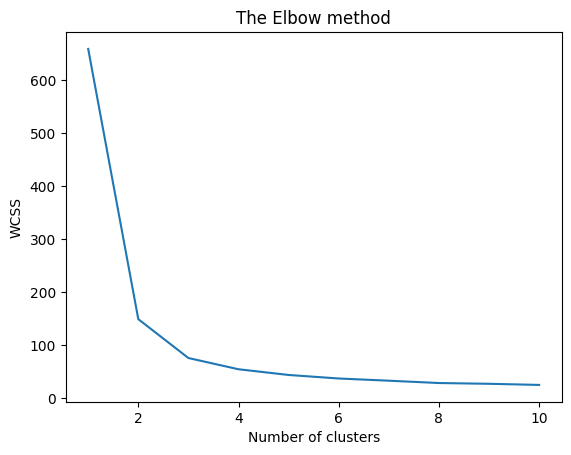

In [37]:
x = df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans

for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init= 'k-means++', 
                      max_iter= 300, n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [39]:
kmeans = KMeans(n_clusters = 3,init='k-means++', 
                  max_iter = 300,n_init = 10,random_state=0)
y_kmeans = kmeans.fit_predict(x)


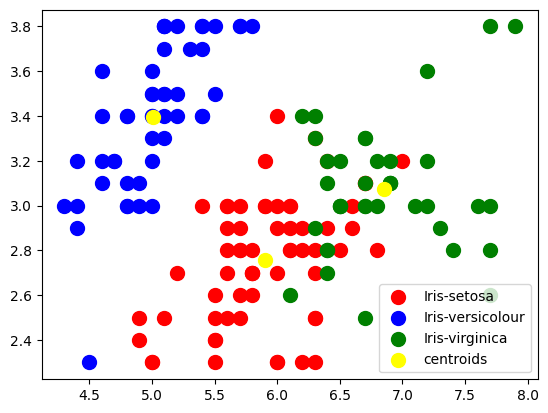

In [45]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
             s=100, c='yellow', label='centroids')
plt.legend()


Here we classified the clusters as the irirs species acc to the features of flower.